In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('./datasets/dogs.csv')

In [6]:
data

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


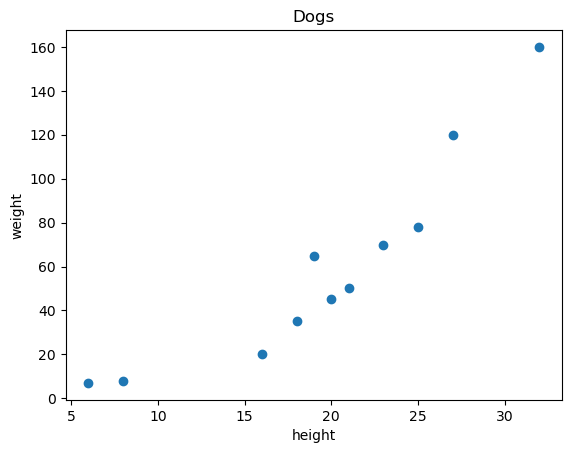

In [7]:
plt.scatter(data['height'], data['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Dogs')
plt.show()

In [10]:
feature_names = data.columns[1:]
feature_names

Index(['height', 'weight'], dtype='object')

In [11]:
X = data[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X)

MinMaxScaler()

In [15]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [16]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [19]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [20]:
kmeans.labels_

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

In [22]:
X[kmeans.labels_ == 0]

,height,weight
0,0.538462,0.248366
2,0.461538,0.183007
3,0.807692,0.738562
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [23]:
kmeans.cluster_centers_

array([[0.65865385, 0.46323529],
       [0.15384615, 0.03050109]])

In [24]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
centers

,height,weight
0,0.658654,0.463235
1,0.153846,0.030501


In [25]:
# SSE
kmeans.inertia_


0.8479588365514269

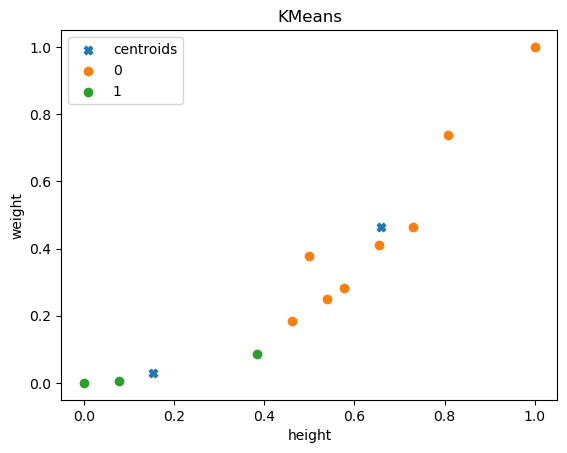

In [26]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)

plt.xlabel('height')
plt.ylabel('weight')
plt.title('KMeans')
plt.legend()
plt.show()

In [27]:
data[kmeans.labels_ == 1]

,breed,height,weight
1,Boston Terrier,16,20
4,Chihuahua,8,8
10,Yorkshire Terrier,6,7


In [28]:
data[kmeans.labels_ == 0]

,breed,height,weight
0,Border Collie,20,45
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [30]:
from sklearn.metrics import silhouette_samples

In [31]:
silhouette_values = silhouette_samples(X, kmeans.labels_)
silhouette_values

array([ 0.28981652,  0.242704  , -0.12137722,  0.53267774,  0.73560541,
        0.57851663,  0.56163616,  0.43579723,  0.40507931,  0.39309297,
        0.71035336])

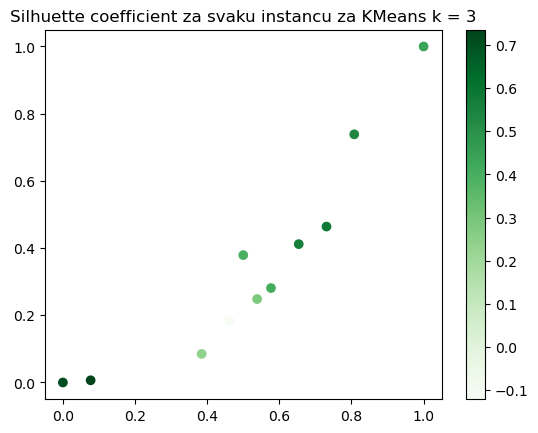

In [32]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhuette coefficient za svaku instancu za KMeans k = 3')
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

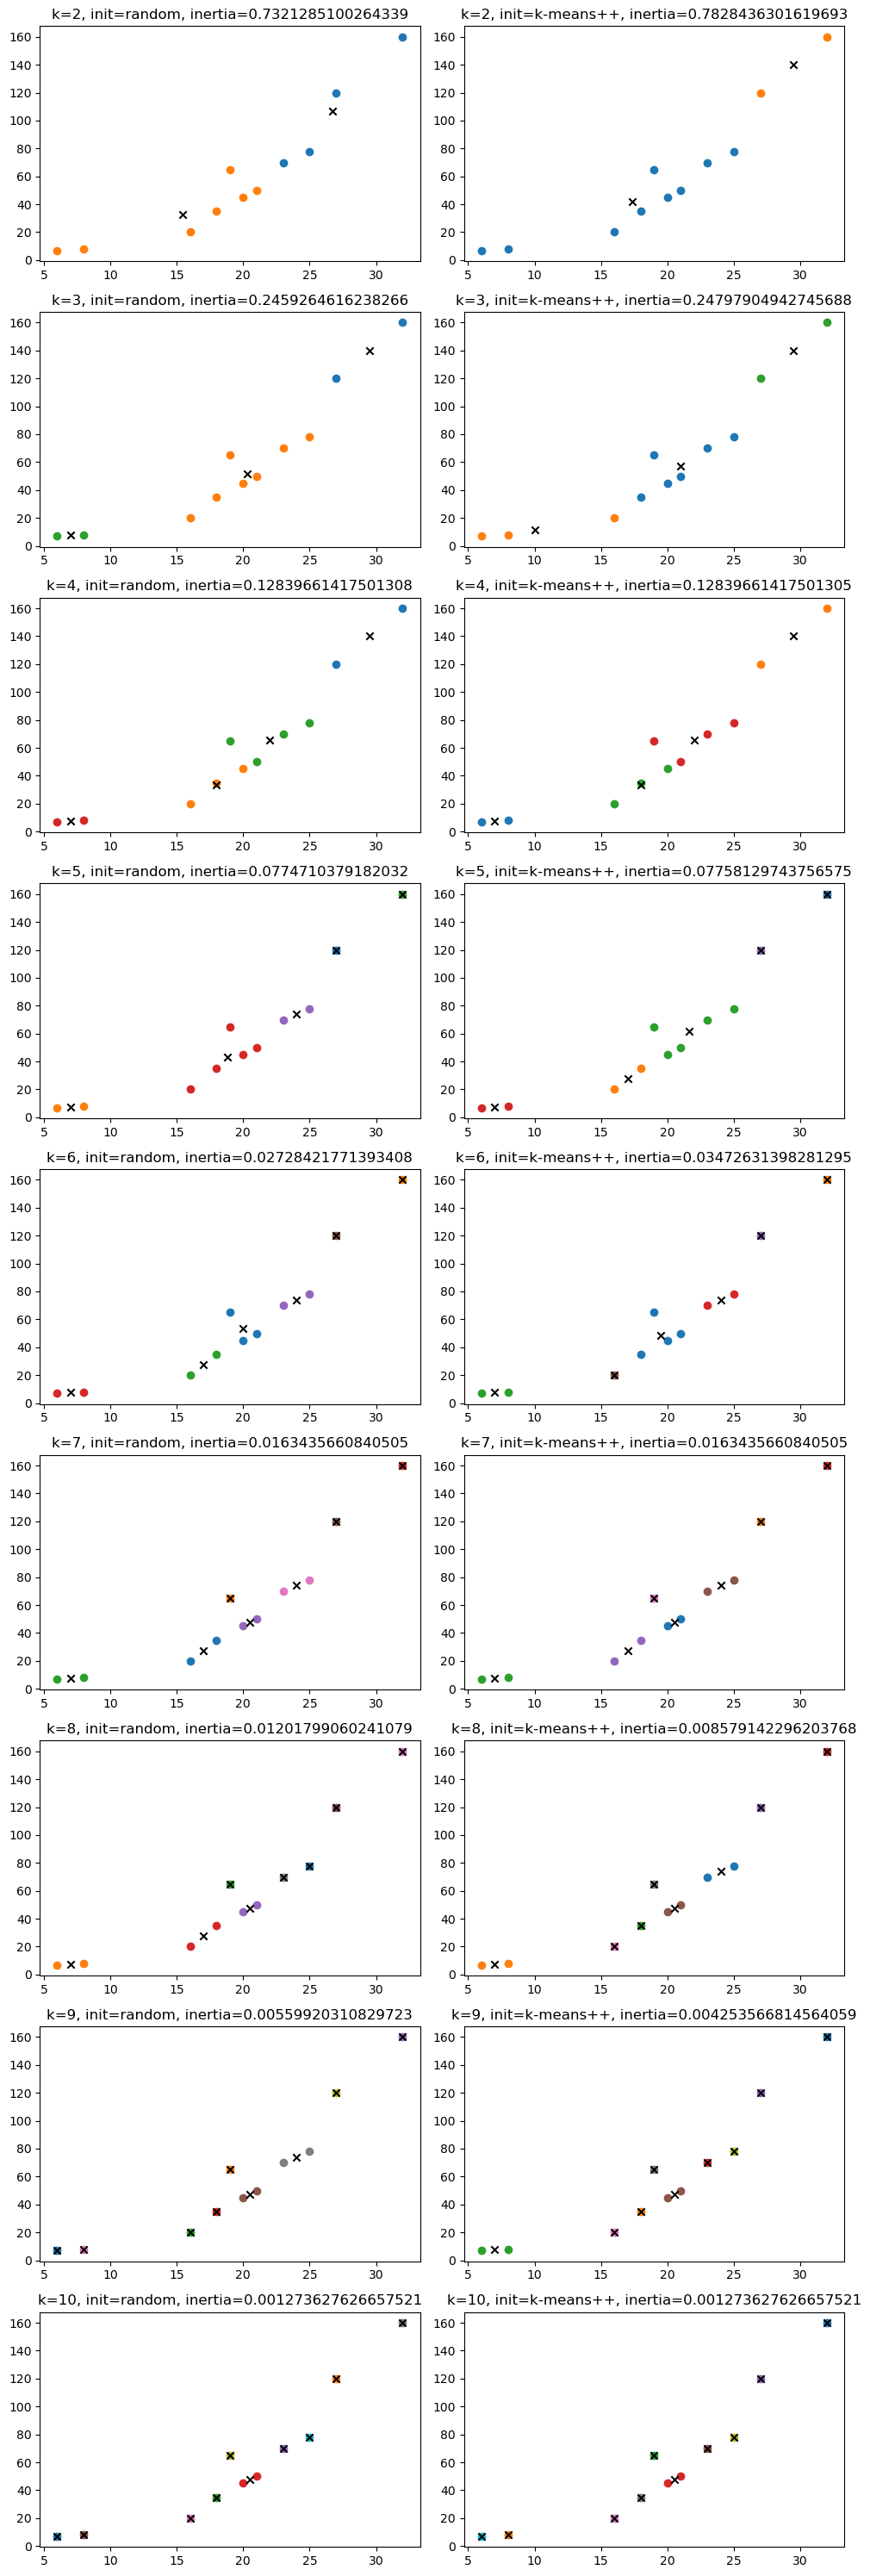

In [37]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhuette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhuette.append(silhouette_score(X, kmeans.labels_))

        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1

        for label in range(k):
            cluster = data[kmeans.labels_ == label]
            plt.scatter(cluster['height'], cluster['weight'])

        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_names)
        plt.scatter(centroids['height'], centroids['weight'], color='black', marker='x')
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')

plt.tight_layout()

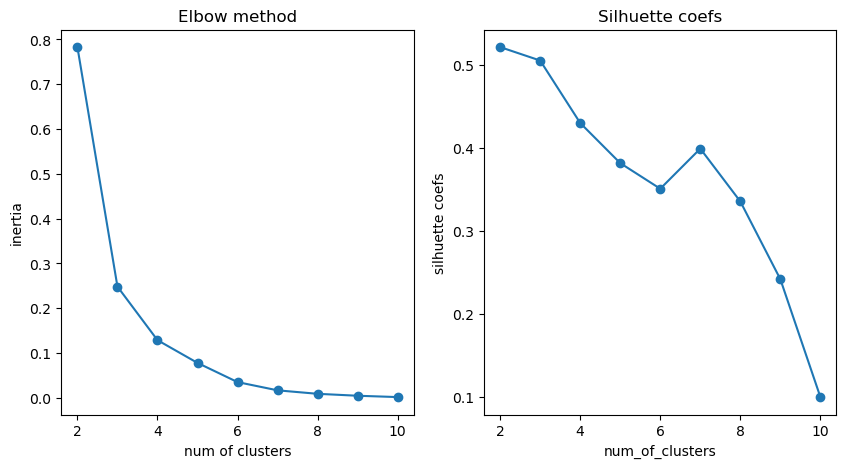

In [38]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(ks, inertias, marker='o')
plt.xlabel('num of clusters')
plt.ylabel('inertia')
plt.title('Elbow method')

plt.subplot(1,2,2)
plt.plot(ks, silhuette, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('silhuette coefs')
plt.title('Silhuette coefs')

plt.show()

In [39]:
import matplotlib.cm as cm

For n_clusters = 2 The average silhuette_socre is 0.5210272444296898
For n_clusters = 3 The average silhuette_socre is 0.5813924452451538
For n_clusters = 4 The average silhuette_socre is 0.481494887542406
For n_clusters = 5 The average silhuette_socre is 0.38128807890396943


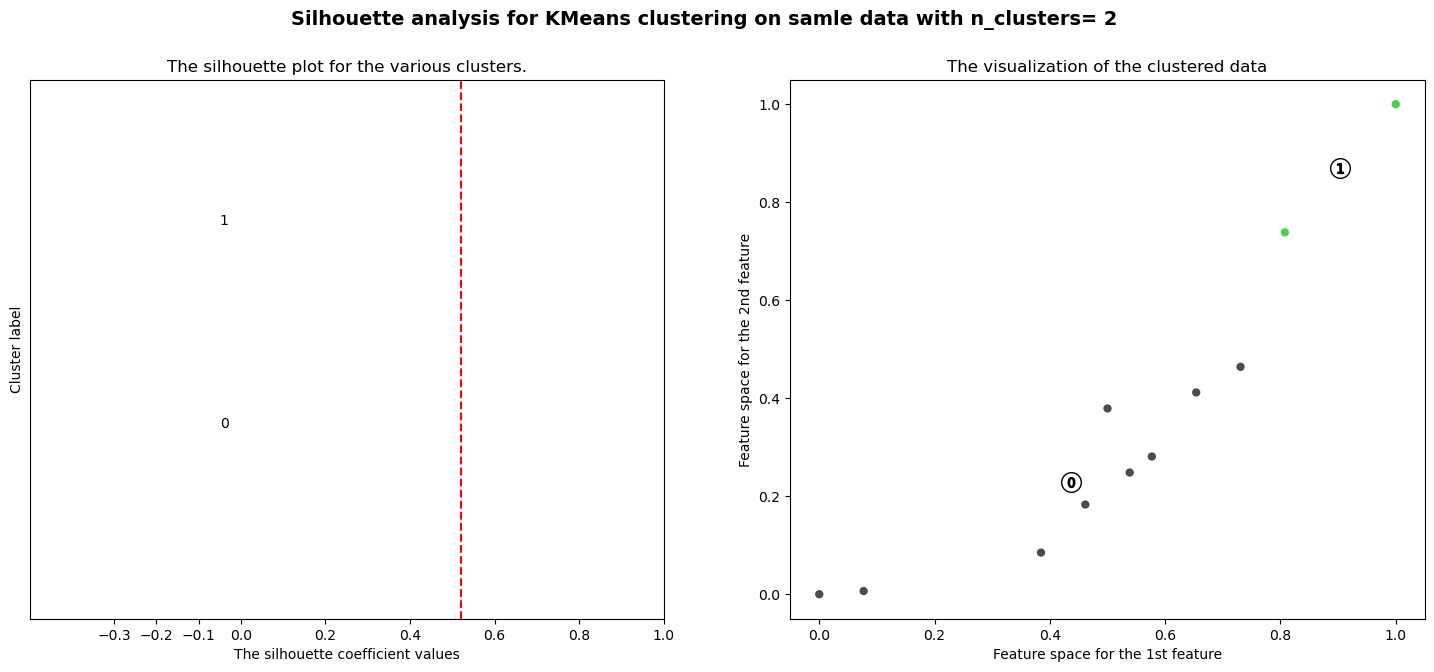

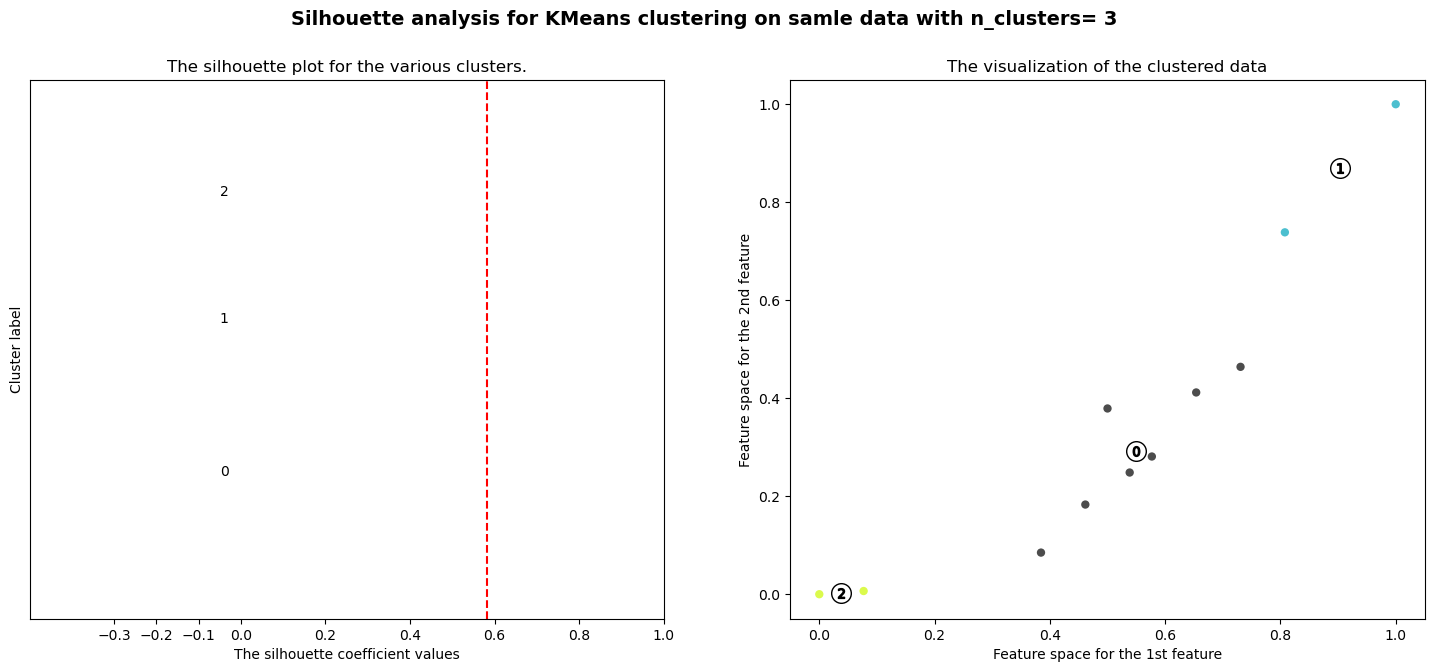

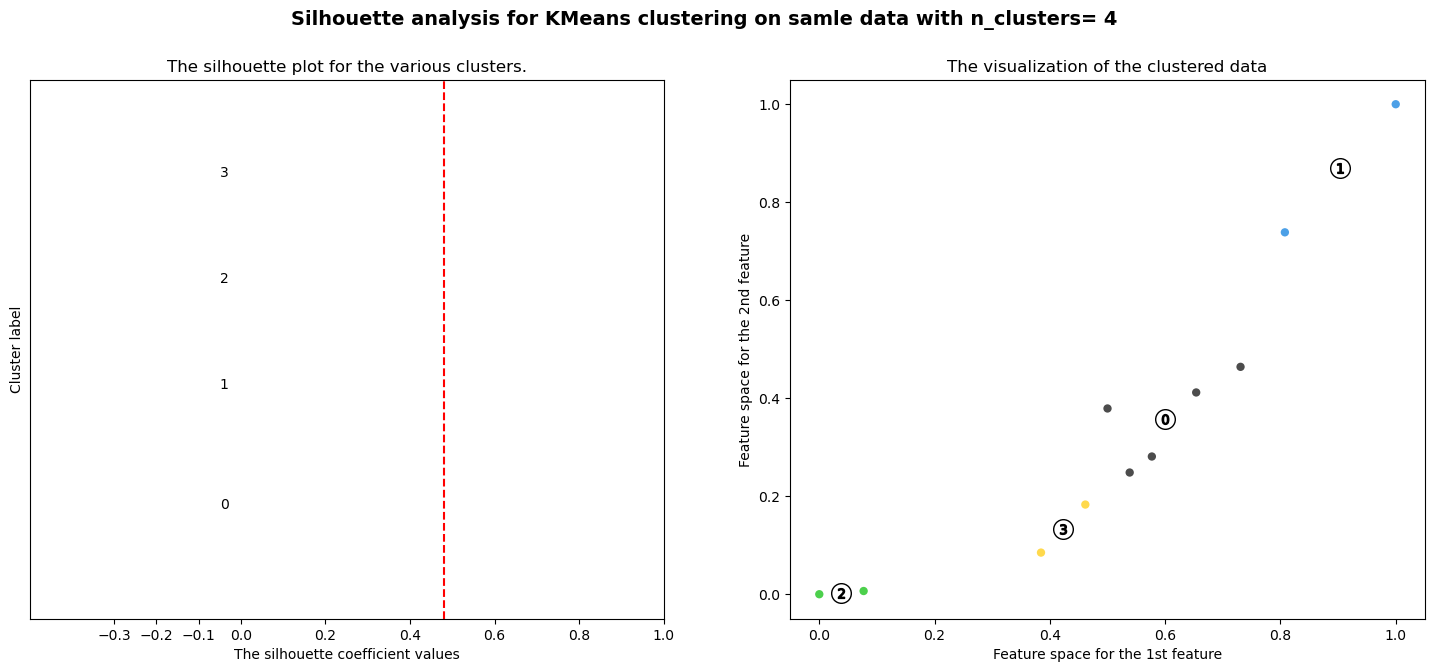

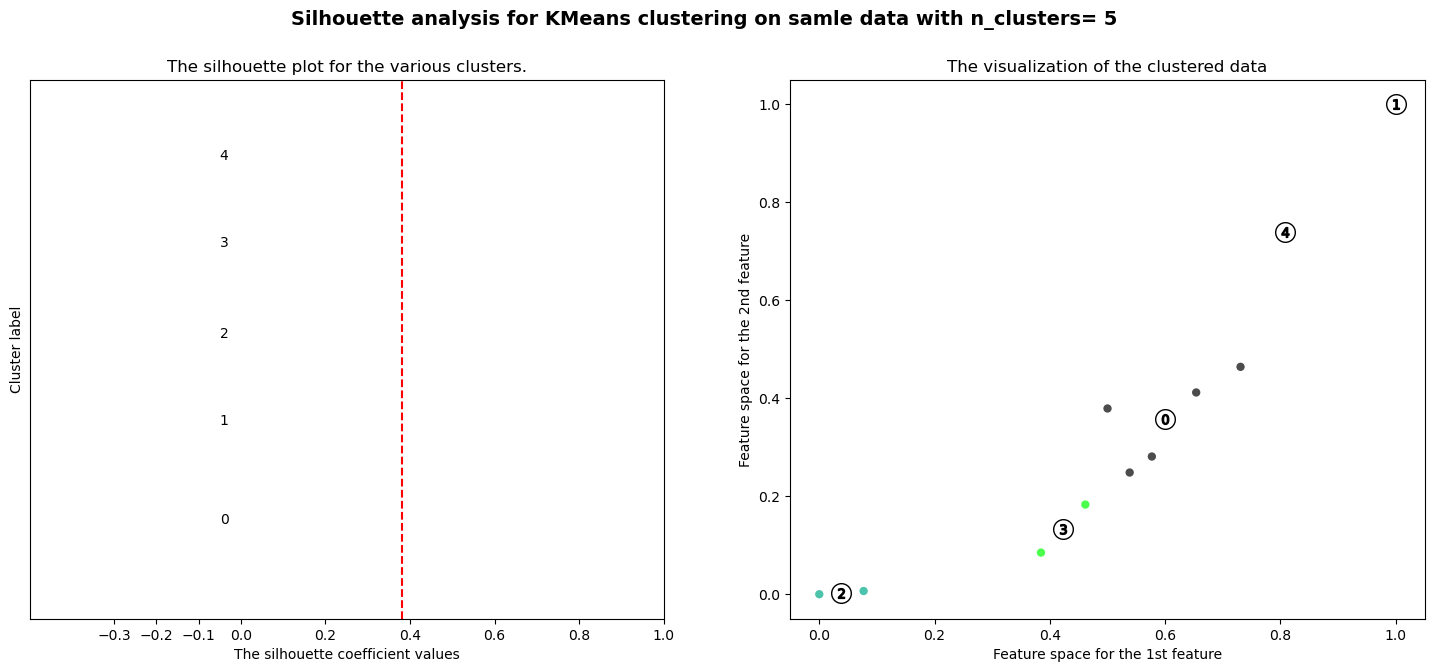

In [45]:
for n_clusters in [2,3,4,5]:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.5,1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'For n_clusters = {n_clusters}', f'The average silhuette_socre is {silhouette_avg}')

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_sil_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_sil_values.sort() 
        size_cluster_i = ith_cluster_sil_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_between(np.arange(y_lower, y_upper),
                        0, ith_cluster_sil_values, 
                        facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(X['height'], X['weight'], marker='o', lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0], centers[:,1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$'%i, alpha=1, s=50, edgecolor='k')

    ax2.set_title('The visualization of the clustered data')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')
    plt.suptitle('Silhouette analysis for KMeans clustering on samle data with n_clusters= %d' % n_clusters, fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5210272444296898
For n_clusters = 3 The average silhouette_score is : 0.5813924452451538
For n_clusters = 4 The average silhouette_score is : 0.481494887542406
For n_clusters = 5 The average silhouette_score is : 0.38128807890396943


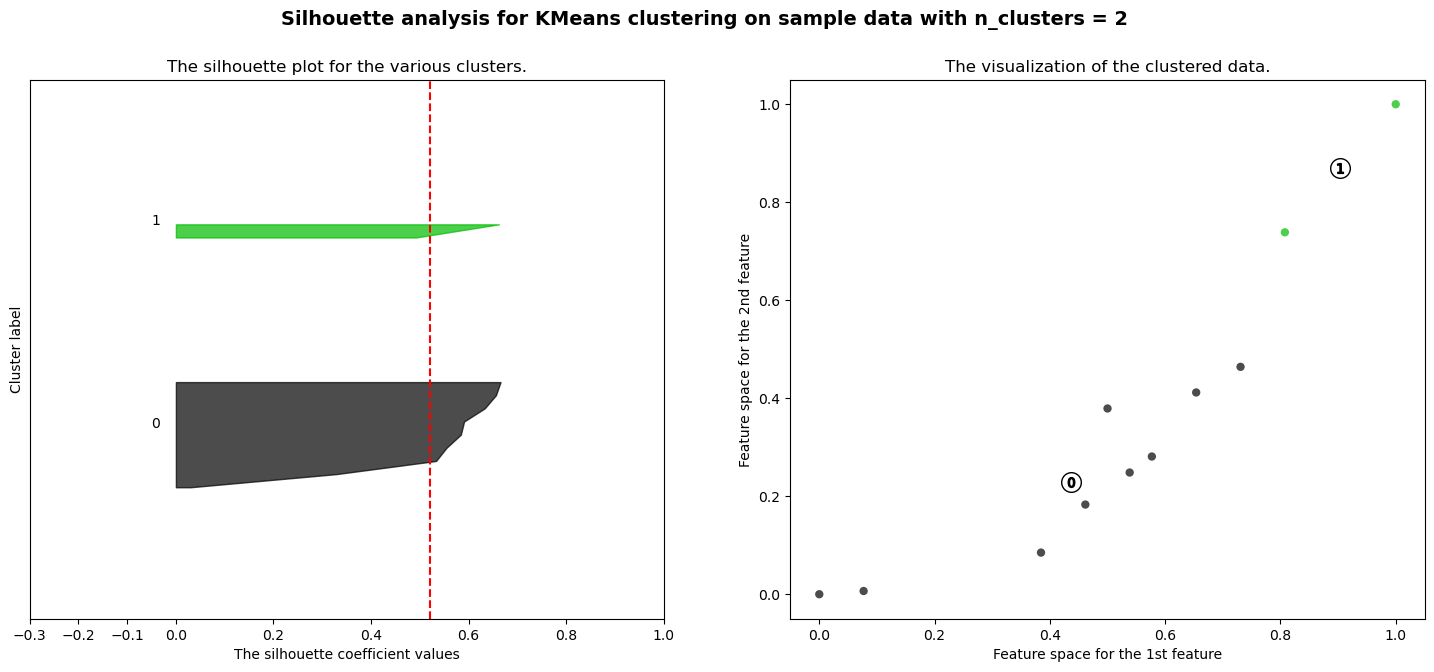

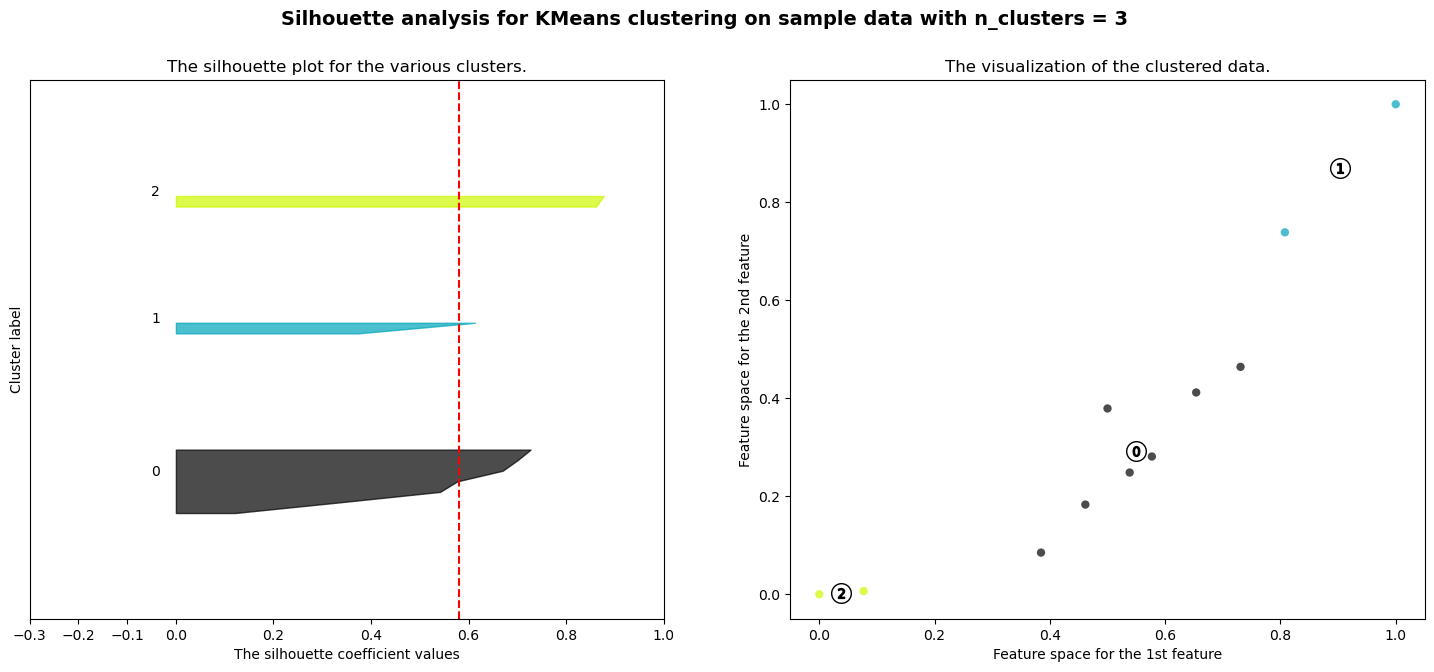

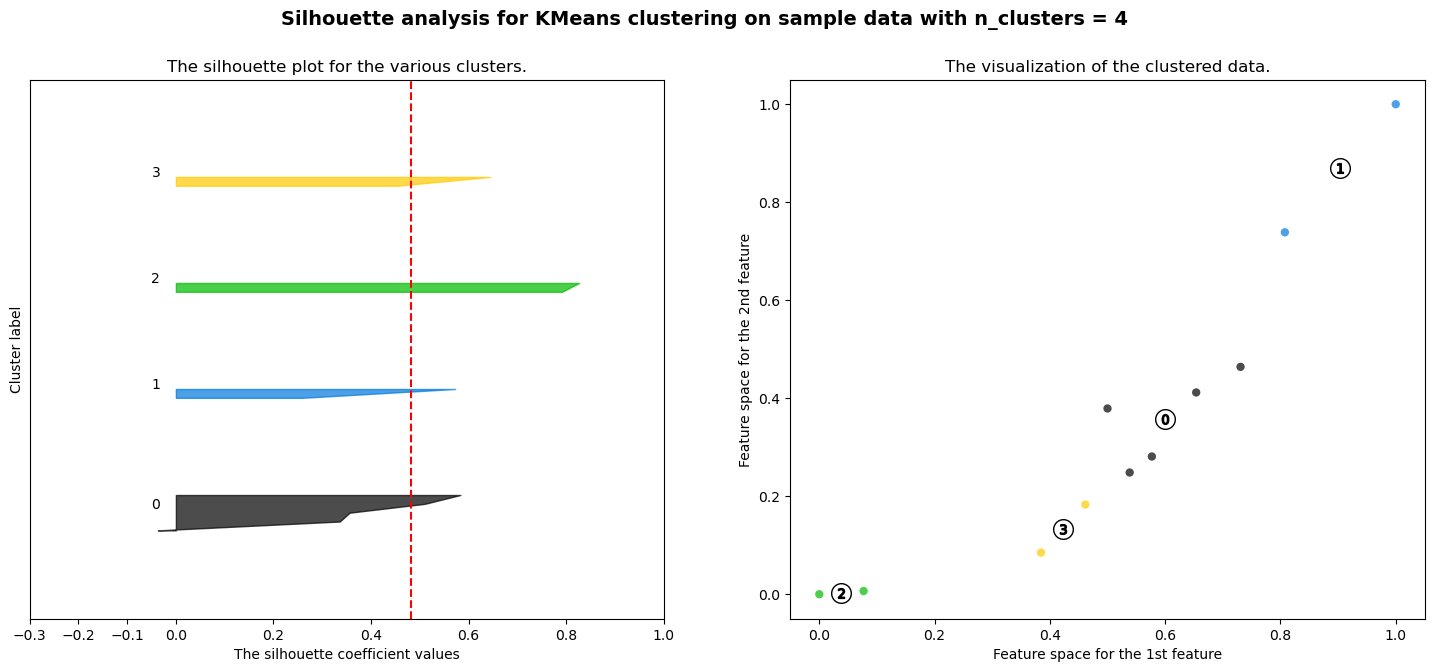

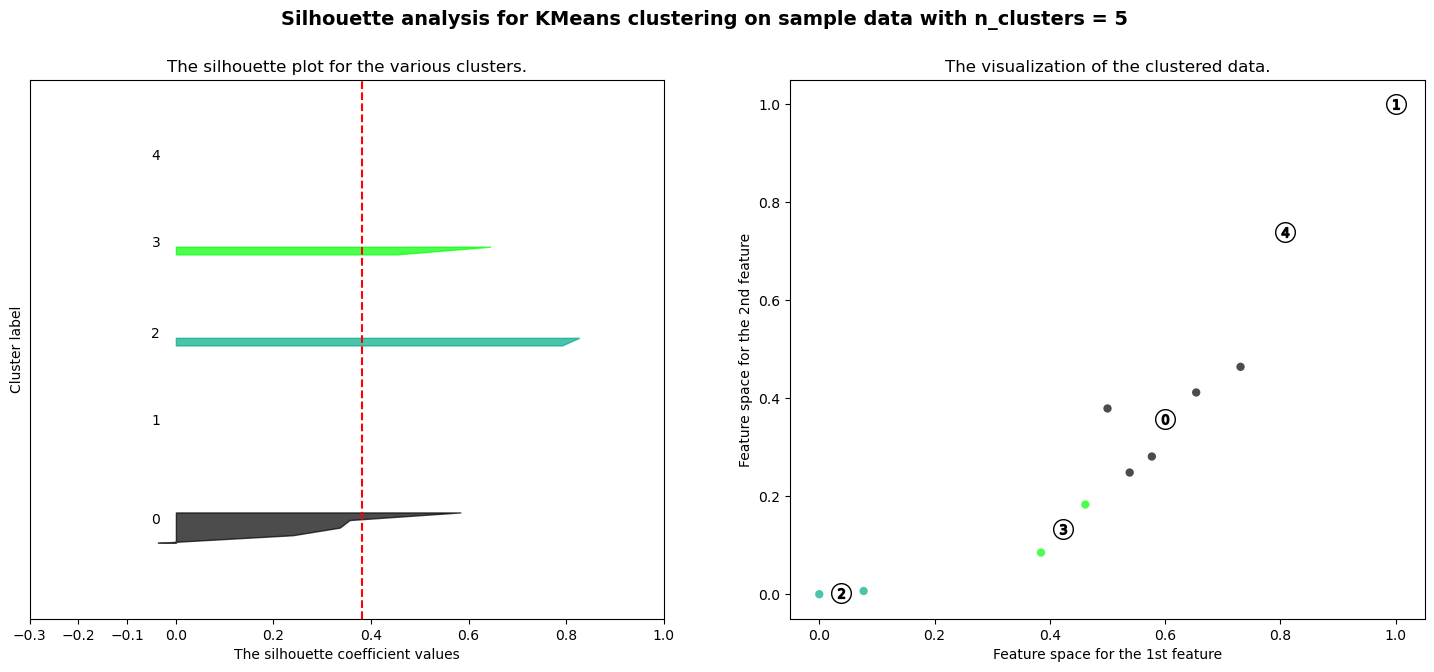

In [44]:
for n_clusters in [2, 3, 4, 5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['height'], X['weight'], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [46]:
# Kompresija slike:

In [47]:
from matplotlib.image import imread
import seaborn as sns

In [48]:
img = imread('./datasets/masa.jpg')
img_size = img.shape

In [49]:
X_img = img.reshape(img_size[0]*img_size[1], img_size[2])

In [50]:
km = KMeans(n_clusters=30, n_init='auto')

In [51]:
km.fit(X_img)

KMeans(n_clusters=30, n_init='auto')

In [52]:
X_comp = km.cluster_centers_[km.labels_]

In [53]:
X_comp = np.clip(X_comp.astype('uint8'), 0, 255)

In [55]:
X_comp = X_comp.reshape(img_size[0], img_size[1], img_size[2])

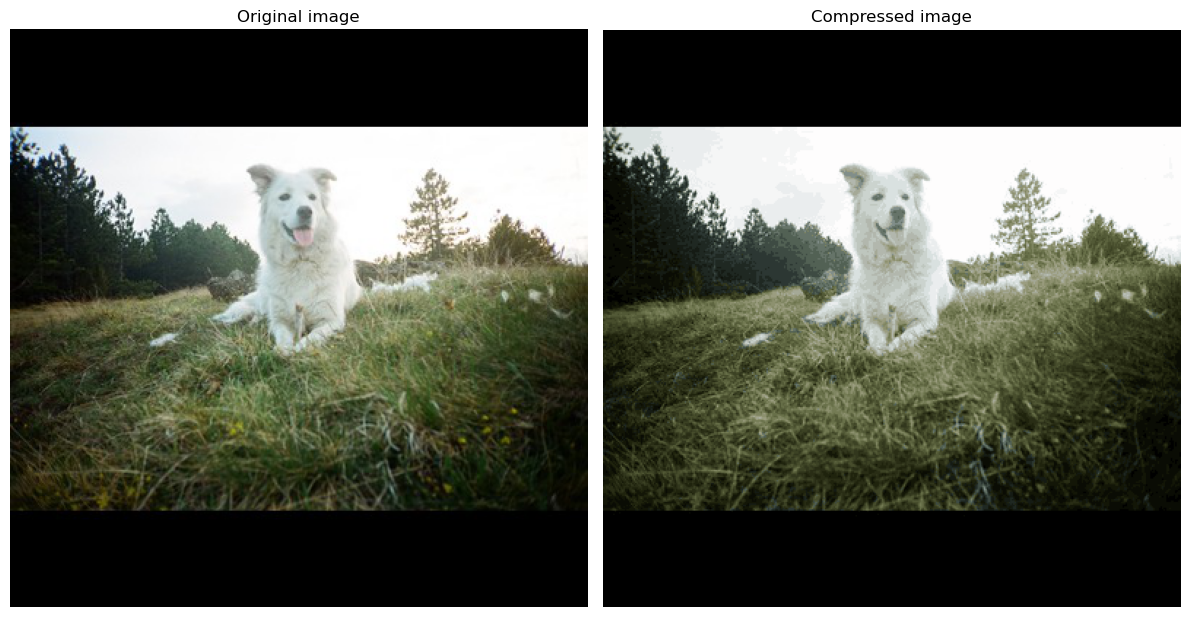

In [56]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
ax[0].imshow(img)
ax[0].set_title('Original image')

ax[1].imshow(X_comp)
ax[1].set_title('Compressed image')

for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

In [57]:
from sklearn.cluster import BisectingKMeans

In [58]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')

In [59]:
bkmeans

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [60]:
def visualize_clustering(data, centers, labels, feature_names, alg_name):
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='centroids', color='black')

    for c in np.unique(labels):
        elems = X[labels == c]
        plt.scatter(elems[feature_names[0]], elems[feature_names[1]], label=c)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'{alg_name} {len(centers)} clusters')
    plt.legend()
    plt.show()

In [61]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

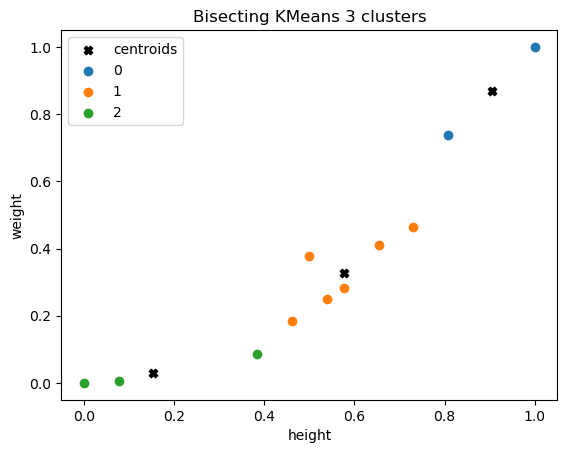

In [62]:
visualize_clustering(X, bkmeans.cluster_centers_, bkmeans.labels_, X.columns, 'Bisecting KMeans')

In [63]:
# FUZZY C MEANS

In [64]:
!pip install scikit-fuzzy

In [65]:
!pip install fuzzy-c-means

In [66]:
from fcmeans import FCM

In [67]:
fcm = FCM(n_clusters=3, m=3)

In [68]:
fcm.fit(X.to_numpy())

In [69]:
labels = fcm.predict(X.to_numpy())

In [70]:
centers = fcm.centers

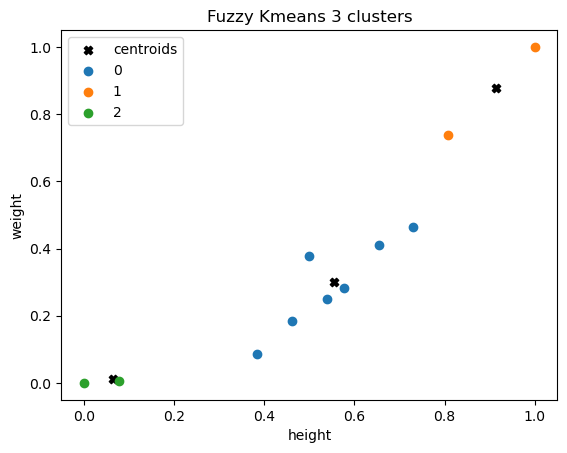

In [71]:
visualize_clustering(X, centers, labels, X.columns, 'Fuzzy Kmeans')

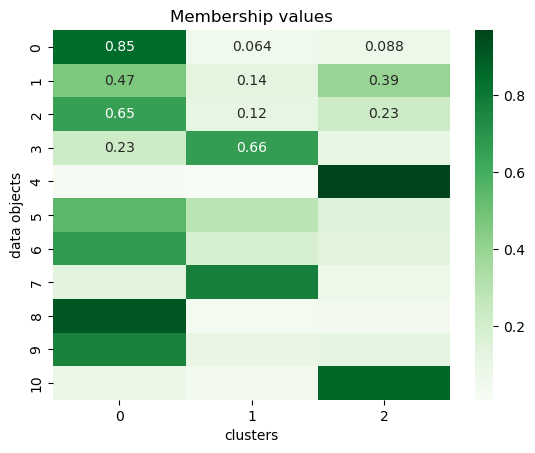

In [72]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title('Membership values')
plt.xlabel('clusters')
plt.ylabel('data objects')
plt.show()